# Robovetter TCES Injection Analysis

In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
df = ascii.read('../data/raw/tces/kplr_dr25_inj1_tces.txt').to_pandas()
df.head()

,TCE_ID,KIC,Disp,Score,NTL,SS,CO,EM,period,epoch,...,Rs,Ts,logg,a,Rp/Rs,a/Rs,impact,SNR_DV,Sp,Fit_Prov
0,000757280-01,757280,PC,0.332,0,0,0,0,380.920455,419.079229,...,1.638,6543,4.082,1.08759,0.013436,135.22,0.6928,8.2,3.725,1
1,000891916-01,891916,PC,1.000,0,0,0,0,202.818535,230.721419,...,0.741,5602,4.587,0.62037,0.040966,286.97,0.4324,18.6,1.259,1
2,000892195-01,892195,FP,0.005,0,0,1,0,192.790771,139.332186,...,1.668,5522,3.984,0.64846,0.015241,81.38,0.2219,12.2,5.512,1
3,000892667-01,892667,PC,0.812,0,0,0,0,182.637810,307.049488,...,1.654,6609,4.105,0.68251,0.016619,81.96,0.2869,13.3,10.039,1
4,000892678-01,892678,PC,0.797,0,0,0,0,142.708025,245.606837,...,1.889,6137,3.936,0.55566,0.011576,55.73,0.7000,12.3,14.688,1


### Feature List

In [4]:
list(df.columns.values)

['TCE_ID',
 'KIC',
 'Disp',
 'Score',
 'NTL',
 'SS',
 'CO',
 'EM',
 'period',
 'epoch',
 'Expected_MES',
 'MES',
 'NTran',
 'depth',
 'duration',
 'Rp',
 'Rs',
 'Ts',
 'logg',
 'a',
 'Rp/Rs',
 'a/Rs',
 'impact',
 'SNR_DV',
 'Sp',
 'Fit_Prov']

### NaN Count
Identify the count of NaN values in the dataset.

In [5]:
df.isna().sum()

TCE_ID          0
KIC             0
Disp            0
Score           0
NTL             0
SS              0
CO              0
EM              0
period          0
epoch           0
Expected_MES    0
MES             0
NTran           0
depth           0
duration        0
Rp              0
Rs              0
Ts              0
logg            0
a               0
Rp/Rs           0
a/Rs            0
impact          0
SNR_DV          0
Sp              0
Fit_Prov        0
dtype: int64

### Target Label Distribution

In [6]:
df['Disp'].describe()

count     45377
unique        2
top          PC
freq      38668
Name: Disp, dtype: object

In [7]:
# Target Label Replacement Routine
df['Disp'].replace('FP', '0', inplace=True)
df['Disp'].replace('PC', '1', inplace=True)
df.head()

,TCE_ID,KIC,Disp,Score,NTL,SS,CO,EM,period,epoch,...,Rs,Ts,logg,a,Rp/Rs,a/Rs,impact,SNR_DV,Sp,Fit_Prov
0,000757280-01,757280,1,0.332,0,0,0,0,380.920455,419.079229,...,1.638,6543,4.082,1.08759,0.013436,135.22,0.6928,8.2,3.725,1
1,000891916-01,891916,1,1.000,0,0,0,0,202.818535,230.721419,...,0.741,5602,4.587,0.62037,0.040966,286.97,0.4324,18.6,1.259,1
2,000892195-01,892195,0,0.005,0,0,1,0,192.790771,139.332186,...,1.668,5522,3.984,0.64846,0.015241,81.38,0.2219,12.2,5.512,1
3,000892667-01,892667,1,0.812,0,0,0,0,182.637810,307.049488,...,1.654,6609,4.105,0.68251,0.016619,81.96,0.2869,13.3,10.039,1
4,000892678-01,892678,1,0.797,0,0,0,0,142.708025,245.606837,...,1.889,6137,3.936,0.55566,0.011576,55.73,0.7000,12.3,14.688,1


### Score

In [14]:
df['Score'].describe()

count    45377.000000
mean         0.740252
std          0.317874
min          0.000000
25%          0.615000
50%          0.889000
75%          0.976000
max          1.000000
Name: Score, dtype: float64

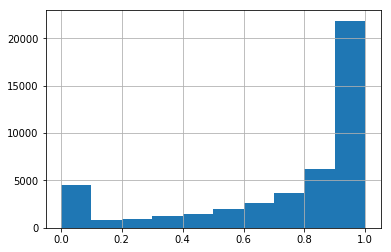

In [16]:
df['Score'].hist()

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Score, dtype: object

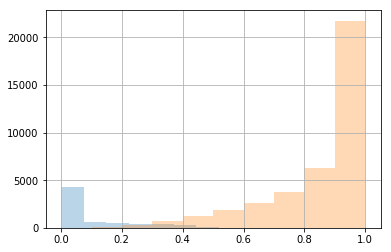

In [48]:
df.groupby('Disp')['Score'].hist(alpha=0.3)

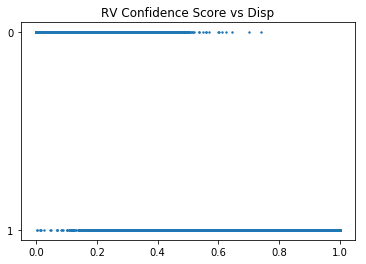

In [25]:
plt.scatter(df['Score'], df['Disp'], s=2)
plt.title('RV Confidence Score vs Disp')
plt.show()

### FP Categories

In [40]:
# FP Co-Occurence Matrix
cat = ['NTL', 'CO', 'SS', 'EM']
fp_cat = df[cat]
fp_com = fp_cat.T.dot(fp_cat)
fp_com

,NTL,CO,SS,EM
NTL,5303,196,0,2
CO,196,1021,13,1
SS,0,13,576,0
EM,2,1,0,23


### Period

In [42]:
df['period'].describe()

count    45377.000000
mean       219.799923
std        138.374036
min          0.506997
25%         97.826114
50%        210.995262
75%        331.259525
max        707.453529
Name: period, dtype: float64

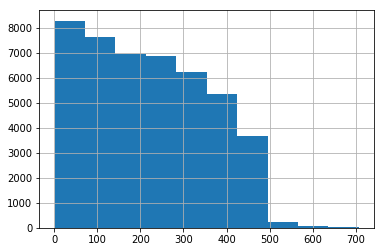

In [43]:
df['period'].hist()

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: period, dtype: object

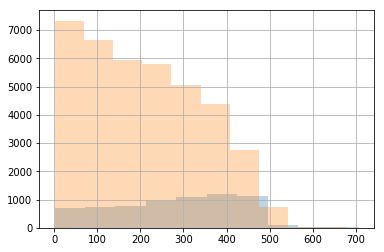

In [47]:
df.groupby('Disp')['period'].hist(alpha=0.3)

### Epoch

In [60]:
df['epoch'].describe()

count    45377.000000
mean       235.714712
std         97.411422
min        131.505622
25%        157.487289
50%        205.242192
75%        287.132486
max        613.456697
Name: epoch, dtype: float64

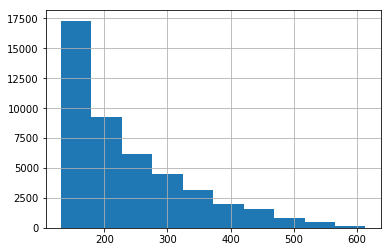

In [62]:
df['epoch'].hist()

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: epoch, dtype: object

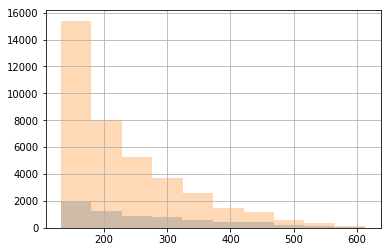

In [65]:
df.groupby('Disp')['epoch'].hist(alpha=0.3)

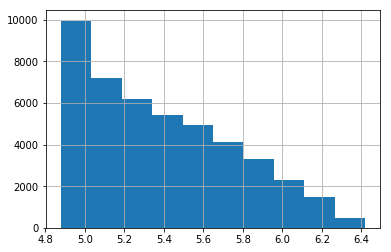

In [74]:
# Perform Log Transformation on Data
df['epoch'].transform(np.log).hist()

### Expected MES

In [76]:
df['Expected_MES'].describe()

count    45377.000000
mean        12.873630
std          8.154413
min          2.889600
25%          9.462200
50%         11.249400
75%         13.403300
max        259.054600
Name: Expected_MES, dtype: float64

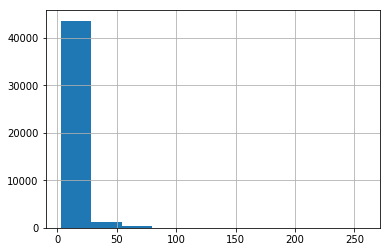

In [77]:
df['Expected_MES'].hist()

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Expected_MES, dtype: object

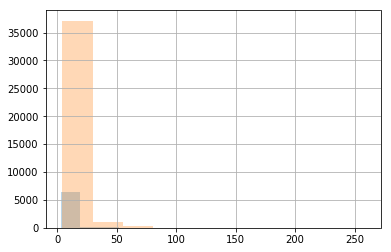

In [78]:
df.groupby('Disp')['Expected_MES'].hist(alpha=0.3)

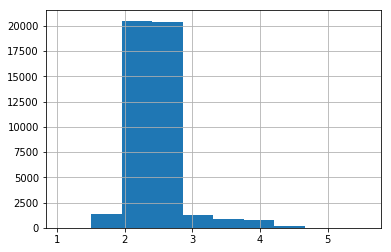

In [79]:
df['Expected_MES'].transform(np.log).hist()

### MES

In [90]:
df['MES'].describe()

count    45377.000000
mean        11.594117
std          7.013999
min          7.100300
25%          8.603300
50%         10.025600
75%         11.960000
max        240.472600
Name: MES, dtype: float64

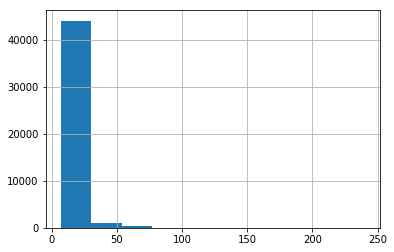

In [91]:
df['MES'].hist()

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MES, dtype: object

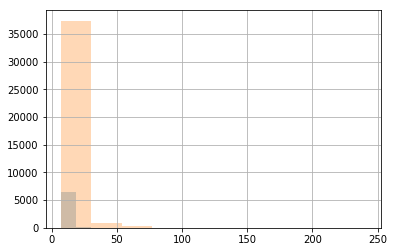

In [92]:
df.groupby('Disp')['MES'].hist(alpha=0.3)

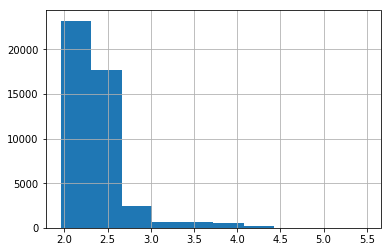

In [93]:
df['MES'].transform(np.log).hist()

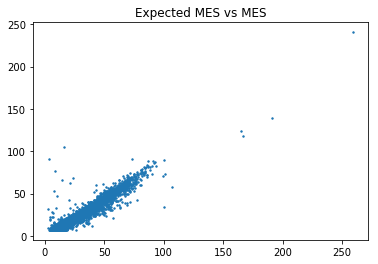

In [95]:
plt.scatter(df['Expected_MES'], df['MES'], s=2)
plt.title('Expected MES vs MES')
plt.show()

The plot generated indicates that we should eliminate MES or Expected MES, since they are highly correlated to each other.
This would indicate that we should consult Dr. Ford for further guidance as to which variables can be used in our analysis.

### NTran

In [96]:
df['NTran'].describe()

count    45377.000000
mean        19.718492
std         74.977549
min          3.000000
25%          4.000000
50%          6.000000
75%         13.000000
max       2324.000000
Name: NTran, dtype: float64

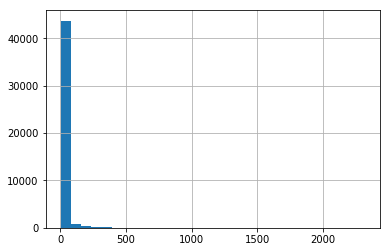

In [98]:
df['NTran'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: NTran, dtype: object

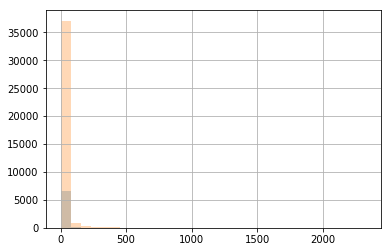

In [100]:
df.groupby('Disp')['NTran'].hist(alpha=0.3, bins=30)

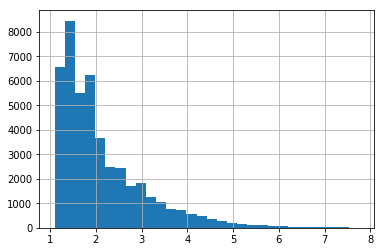

In [190]:
# Recommendation: Perform Log Transformation to Data
df['NTran'].transform(np.log).hist(bins=30)

### Depth

In [104]:
df['depth'].describe()

count    4.537700e+04
mean     1.307613e+03
std      6.926692e+04
min      0.000000e+00
25%      2.481000e+02
50%      4.287000e+02
75%      6.994000e+02
max      1.130898e+07
Name: depth, dtype: float64

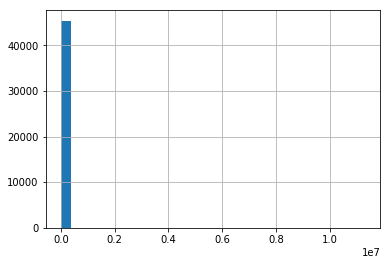

In [108]:
df['depth'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: depth, dtype: object

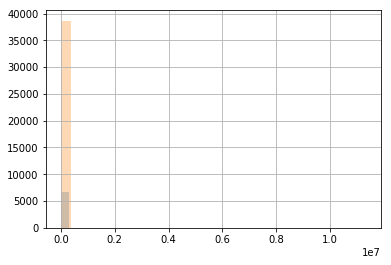

In [110]:
df.groupby('Disp')['depth'].hist(alpha=0.3, bins=30)

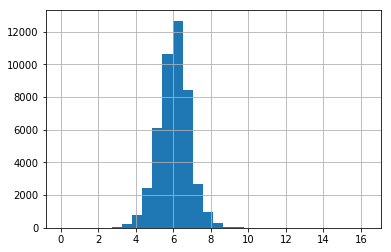

In [153]:
df['depth'].transform(lambda x: np.log(x+1)).hist(bins=30)

### Duration

In [114]:
df['duration'].describe()

count    45377.000000
mean         9.851704
std          5.414777
min          0.569300
25%          6.454600
50%          9.149300
75%         12.008000
max         85.971300
Name: duration, dtype: float64

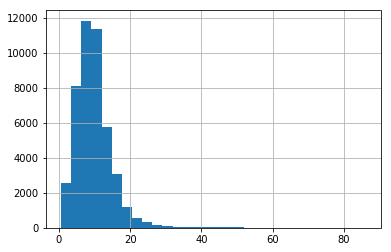

In [117]:
df['duration'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration, dtype: object

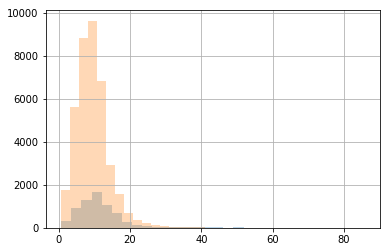

In [116]:
df.groupby('Disp')['duration'].hist(alpha=0.3, bins=30)

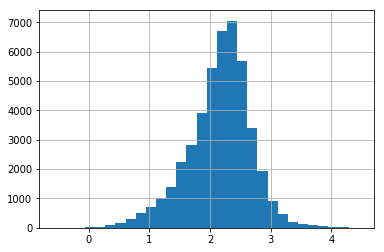

In [189]:
df['duration'].transform(np.log).hist(bins=30)

# Rp

In [119]:
df['Rp'].describe()

count    45377.000000
mean         2.711487
std          6.340238
min          0.028000
25%          1.688000
50%          2.168000
75%          2.832000
max        860.095000
Name: Rp, dtype: float64

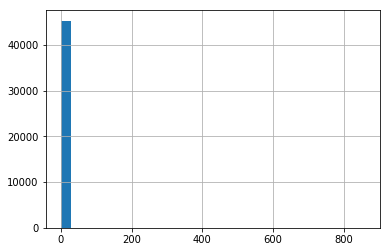

In [122]:
df['Rp'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rp, dtype: object

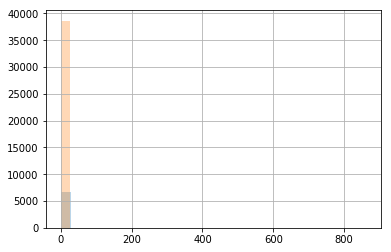

In [123]:
df.groupby('Disp')['Rp'].hist(alpha=0.3, bins=30)

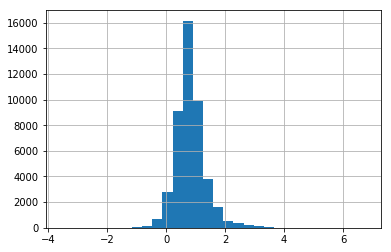

In [154]:
df['Rp'].transform(np.log).hist(bins=30)

### Rs

In [125]:
df['Rs'].describe()

count    45377.000000
mean         1.224643
std          1.680157
min          0.107000
25%          0.818000
50%          0.963000
75%          1.174000
max        178.568000
Name: Rs, dtype: float64

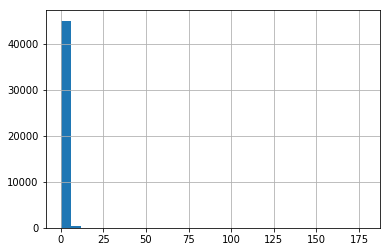

In [126]:
df['Rs'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rs, dtype: object

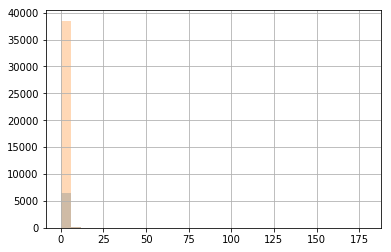

In [128]:
df.groupby('Disp')['Rs'].hist(alpha=0.3, bins=30)

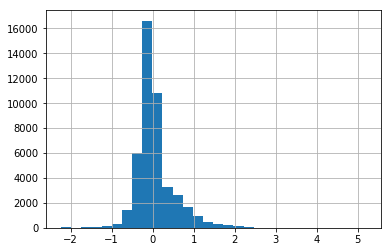

In [155]:
df['Rs'].transform(np.log).hist(bins=30)

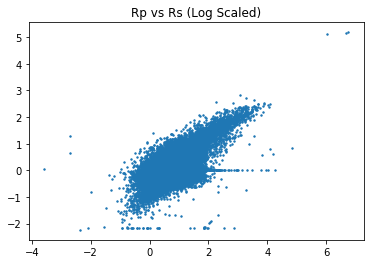

In [134]:
plt.scatter(df['Rp'].transform(np.log), df['Rs'].transform(np.log), s=2)
plt.title('Rp vs Rs (Log Scaled)')
plt.show()

### Ts

In [136]:
df['Ts'].describe()

count    45377.000000
mean      5747.525442
std        719.493656
min       2661.000000
25%       5381.000000
50%       5825.000000
75%       6153.000000
max      15896.000000
Name: Ts, dtype: float64

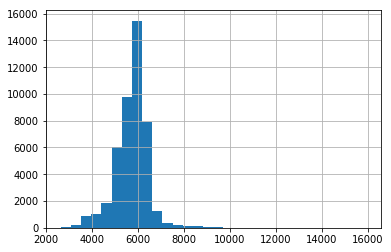

In [142]:
df['Ts'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Ts, dtype: object

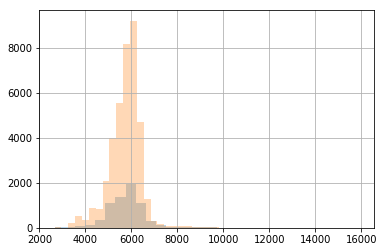

In [139]:
df.groupby('Disp')['Ts'].hist(alpha=0.3, bins=30)

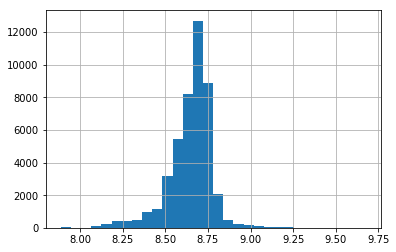

In [141]:
df['Ts'].transform(np.log).hist(bins=30)

### Logg

In [143]:
df['logg'].describe()

count    45377.000000
mean         4.371089
std          0.315582
min         -0.090000
25%          4.322000
50%          4.468000
75%          4.552000
max          5.387000
Name: logg, dtype: float64

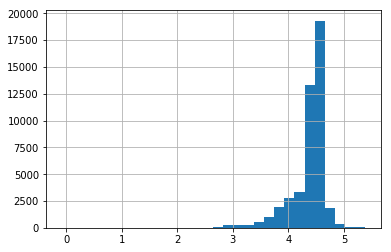

In [145]:
df['logg'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: logg, dtype: object

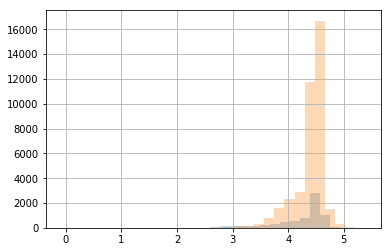

In [146]:
df.groupby('Disp')['logg'].hist(alpha=0.3, bins=30)

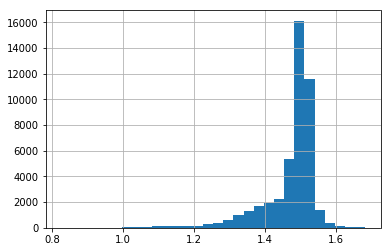

In [162]:
df['logg'].transform(np.log).hist(bins=30)

### a

In [163]:
df['a'].describe()

count    45377.000000
mean         0.668536
std          0.321106
min          0.000000
25%          0.410230
50%          0.684710
75%          0.925270
max          1.836710
Name: a, dtype: float64

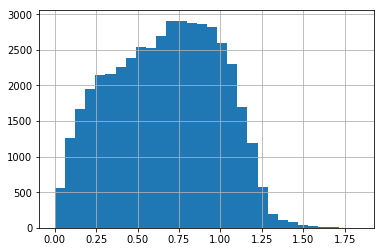

In [165]:
df['a'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: a, dtype: object

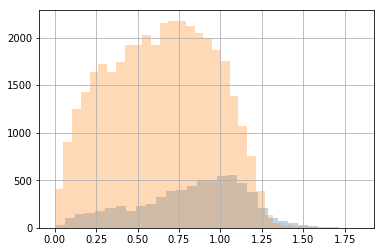

In [166]:
df.groupby('Disp')['a'].hist(alpha=0.3, bins=30)

### Rp/Rs

In [176]:
df['Rp/Rs'].describe()

count    45377.000000
mean         0.021694
std          0.016333
min          0.000172
25%          0.015153
50%          0.019881
75%          0.025394
max          1.399102
Name: Rp/Rs, dtype: float64

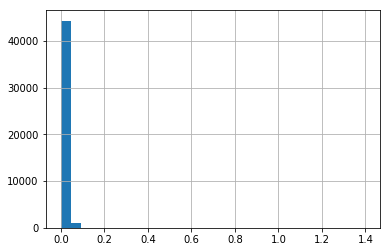

In [178]:
df['Rp/Rs'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Rp/Rs, dtype: object

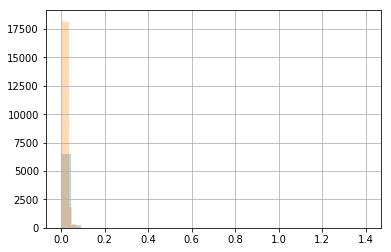

In [179]:
df.groupby('Disp')['Rp/Rs'].hist(alpha=0.3, bins=30)

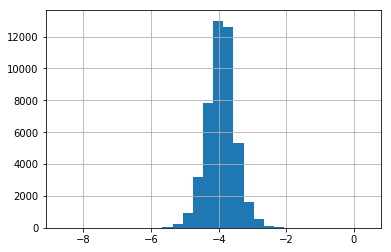

In [183]:
df['Rp/Rs'].transform(np.log).hist(bins=30)

### a/Rs

In [185]:
df['a/Rs'].describe()

count    45377.000000
mean       149.563197
std        108.861255
min          1.340000
25%         71.120000
50%        129.500000
75%        203.960000
max       1929.720000
Name: a/Rs, dtype: float64

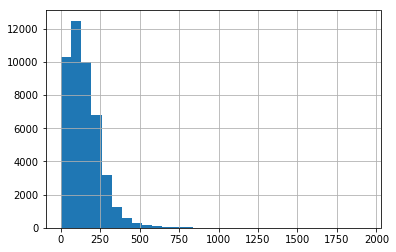

In [186]:
df['a/Rs'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: a/Rs, dtype: object

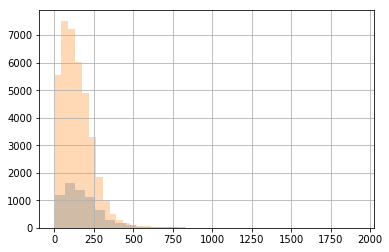

In [187]:
df.groupby('Disp')['a/Rs'].hist(alpha=0.3, bins=30)

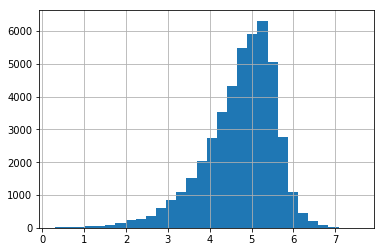

In [188]:
df['a/Rs'].transform(np.log).hist(bins=30)

### impact

In [191]:
df['impact'].describe()

count    45377.000000
mean         0.500700
std          0.276615
min          0.000000
25%          0.286700
50%          0.505200
75%          0.710500
max          1.000000
Name: impact, dtype: float64

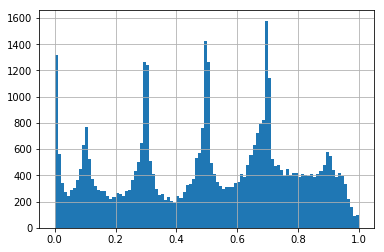

In [197]:
df['impact'].hist(bins=100)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: impact, dtype: object

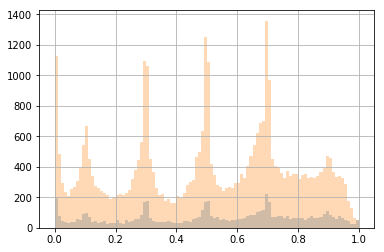

In [198]:
df.groupby('Disp')['impact'].hist(alpha=0.3, bins=100)

### SNR_DV

In [199]:
df['SNR_DV'].describe()

count    45377.000000
mean        12.155330
std          7.113542
min         -1.000000
25%          9.000000
50%         10.600000
75%         12.700000
max        124.600000
Name: SNR_DV, dtype: float64

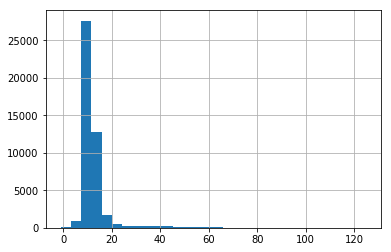

In [200]:
df['SNR_DV'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: SNR_DV, dtype: object

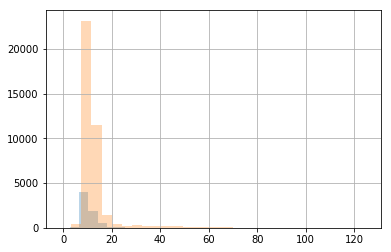

In [202]:
df.groupby('Disp')['SNR_DV'].hist(alpha=0.3, bins=30)

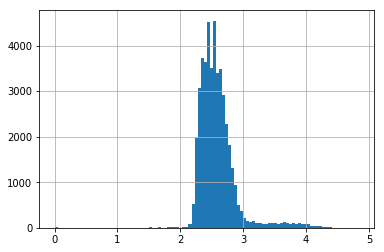

In [206]:
df['SNR_DV'].transform(lambda x: np.log(x+2)).hist(bins=100)

### Sp

In [208]:
df['Sp'].describe()

count    45377.000000
mean        44.695313
std        613.933511
min          0.000000
25%          1.033000
50%          2.458000
75%          8.215000
max      75406.193000
Name: Sp, dtype: float64

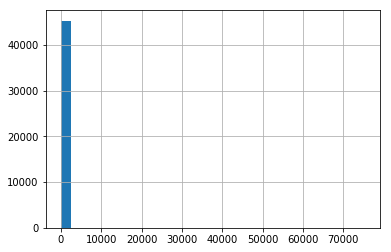

In [210]:
df['Sp'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sp, dtype: object

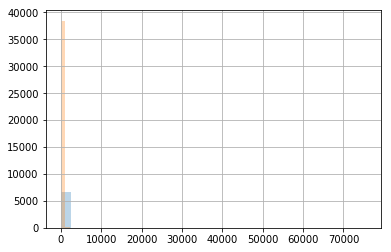

In [211]:
df.groupby('Disp')['Sp'].hist(alpha=0.3, bins=30)

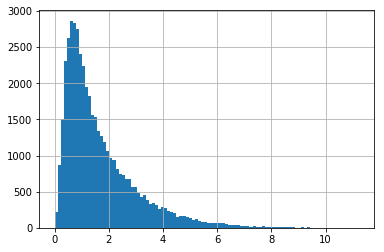

In [217]:
df['Sp'].transform(lambda x: np.log(x+1)).hist(bins=100)

### Fit_Prov

In [218]:
df['Fit_Prov'].describe()

count    45377.000000
mean         0.996849
std          0.056049
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Fit_Prov, dtype: float64

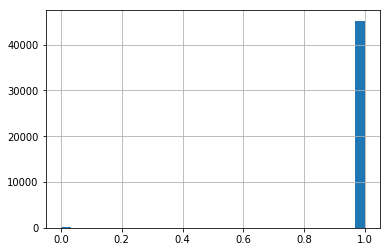

In [222]:
df['Fit_Prov'].hist(bins=30)

Disp
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fit_Prov, dtype: object

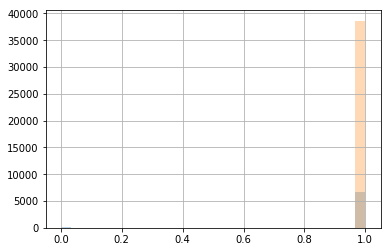

In [233]:
df.groupby('Disp')['Fit_Prov'].hist(alpha=0.3, bins=30)

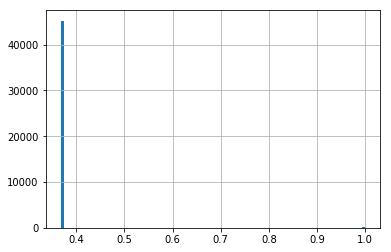

In [241]:
df['Fit_Prov'].transform(lambda x: 1/np.exp(x)).hist(bins=100)

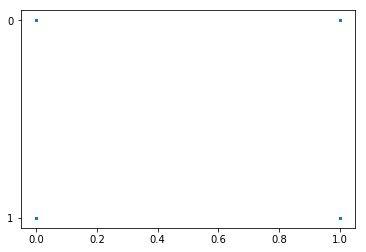

In [242]:
plt.scatter(df['Fit_Prov'], df['Disp'], s=2)
plt.show()